# Test 1 - Data Preprocessing

## Date: January 23, 2020

In [1]:
import pandas as pd
import glob

In [2]:
#read the data
hny = pd.read_csv('../HoneyData/Honey.csv')

In [3]:
#creating the dataframe
d = {'LAT':[], 'LON':[], 'PARAMETER':[], 'YEAR':[], 'JAN':[], 'FEB':[], 'MAR':[], 'APR':[], 'MAY':[],
       'JUN':[], 'JUL':[], 'AUG':[], 'SEP':[], 'OCT':[], 'NOV':[], 'DEC':[], 'ANN':[]}
dtf = pd.DataFrame(d)

In [4]:
#combining the multiple data
##NOT USED ANYMORE
for el in glob.glob('../WeatherData/*.csv'):
    dat = pd.read_csv(el, skiprows=17)
    dat['STATE'] = el.split('/')[-1].split('.')[0]
    dtf = pd.concat([dtf, dat], sort=False)

In [5]:
#only using the yearly data
#dtf_year = dtf[['PARAMETER', 'YEAR', 'ANN', 'STATE']]
#dtf_trs_year = pd.pivot_table(dtf_year, values='ANN', columns='PARAMETER', index=['YEAR','STATE']).reset_index(drop=False)

In [37]:
#loading the lattest data
dtf = pd.read_csv('../data_processed/collatedComplex.csv')

In [38]:
dtf.head(2)

PARAMETER  YEAR    STATE  NUMCOL  LBPERCOL  TOTALLB  PRICEPERLB  \
0  ALLSKY_TOA_SW_DWN  2019  ALABAMA    7000        42   294000     3.20068   
1  ALLSKY_SFC_SW_DWN  2019  ALABAMA    7000        42   294000     3.20068   

   TOTALPRICE    JAN    FEB  ...    APR    MAY    JUN    JUL    AUG    SEP  \
0      941000  19.35  24.21  ...  36.16  39.95  41.35  40.50  37.32  32.41   
1      941000   8.91   9.21  ...  19.85  23.37  21.39  20.32  20.60  20.48   

     OCT    NOV    DEC    ANN  
0  26.12  20.58  17.82  30.31  
1  11.47  11.29   7.86  15.77  

[2 rows x 21 columns]

In [39]:
#using the monthly data [for now we are not using the month directly]
dtf_melted = dtf.melt(id_vars=['PARAMETER', 'YEAR', 'STATE', 'LBPERCOL', 'NUMCOL'], value_vars=['JAN', 'FEB', 'MAR', 'APR', 'MAY',
       'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']).rename(columns={'variable':'month'})
dtf_trs = pd.pivot_table(dtf_melted, values='value', columns='PARAMETER', index=['YEAR','STATE', 'month', 'NUMCOL']).reset_index(drop=False)

In [40]:
dtf_melted['PARAM+MONTH'] = dtf_melted['PARAMETER'] + '-' + dtf_melted['month']

In [41]:
dtf_melted.head(3)

PARAMETER  YEAR    STATE  LBPERCOL  NUMCOL month   value  \
0  ALLSKY_TOA_SW_DWN  2019  ALABAMA        42    7000   JAN   19.35   
1  ALLSKY_SFC_SW_DWN  2019  ALABAMA        42    7000   JAN    8.91   
2            PRECTOT  2019  ALABAMA        42    7000   JAN  130.80   

             PARAM+MONTH  
0  ALLSKY_TOA_SW_DWN-JAN  
1  ALLSKY_SFC_SW_DWN-JAN  
2            PRECTOT-JAN

In [42]:
#pivot table for the parameters
dtf_trs_month = pd.pivot_table(dtf_melted, values='value', columns='PARAM+MONTH', index=['YEAR','STATE', 'LBPERCOL', 'NUMCOL']).reset_index(drop=False)

In [43]:
dtf = pd.merge(hny, dtf_trs, left_on=['YEAR', 'STATE'], right_on=['YEAR','STATE'], how='inner')
#dtf_year = pd.merge(hny, dtf_trs_year, left_on=['YEAR', 'STATE'], right_on=['YEAR','STATE'])
dtf_month = pd.merge(hny, dtf_trs_month, left_on=['YEAR', 'STATE'], right_on=['YEAR','STATE'], how='inner')

In [44]:
dtf.shape

(16896, 12)

In [45]:
#dtf.to_csv('../data_processed/usa_honey_data_month_as_row.csv')
#dtf_year.to_csv('../data_processed/data_pivoted_year.csv')

## Part II - Feature Engineering

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
dtf_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1408 entries, 0 to 1407
Data columns (total 88 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YEAR                   1408 non-null   int64  
 1   STATE                  1408 non-null   object 
 2   HONEY                  1408 non-null   int64  
 3   LBPERCOL               1408 non-null   int64  
 4   ALLSKY_SFC_SW_DWN-APR  1408 non-null   float64
 5   ALLSKY_SFC_SW_DWN-AUG  1408 non-null   float64
 6   ALLSKY_SFC_SW_DWN-DEC  1408 non-null   float64
 7   ALLSKY_SFC_SW_DWN-FEB  1408 non-null   float64
 8   ALLSKY_SFC_SW_DWN-JAN  1408 non-null   float64
 9   ALLSKY_SFC_SW_DWN-JUL  1408 non-null   float64
 10  ALLSKY_SFC_SW_DWN-JUN  1408 non-null   float64
 11  ALLSKY_SFC_SW_DWN-MAR  1408 non-null   float64
 12  ALLSKY_SFC_SW_DWN-MAY  1408 non-null   float64
 13  ALLSKY_SFC_SW_DWN-NOV  1408 non-null   float64
 14  ALLSKY_SFC_SW_DWN-OCT  1408 non-null   float64
 15  ALLS

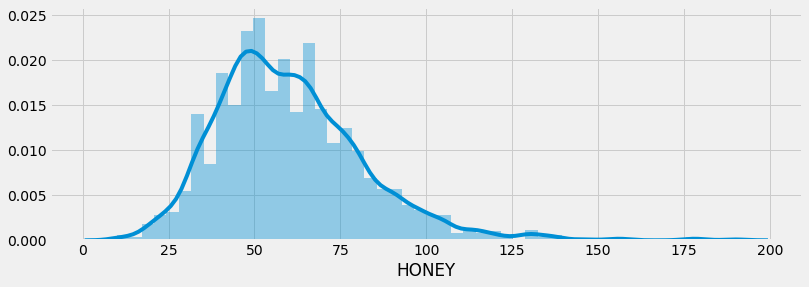

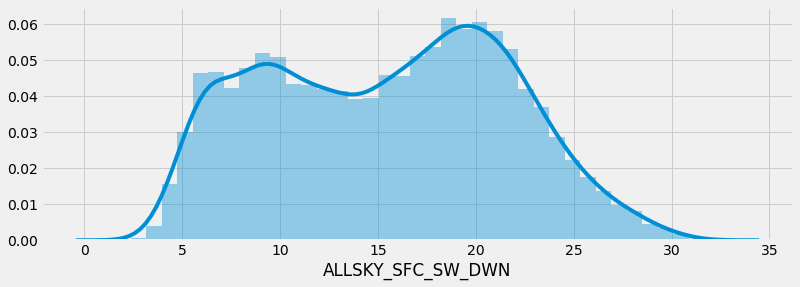

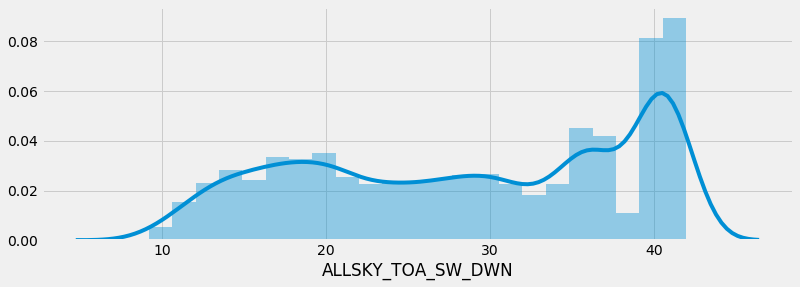

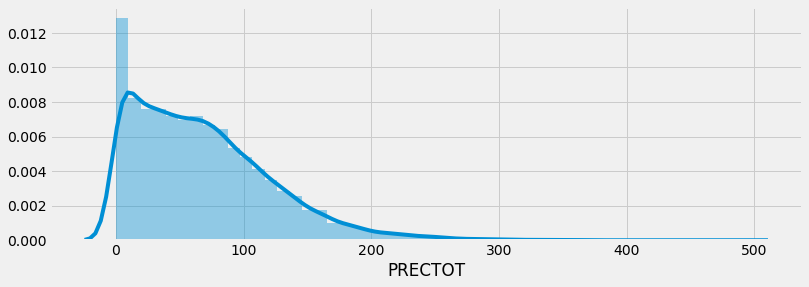

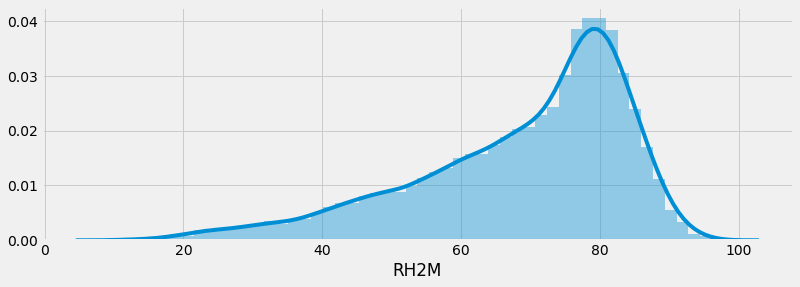

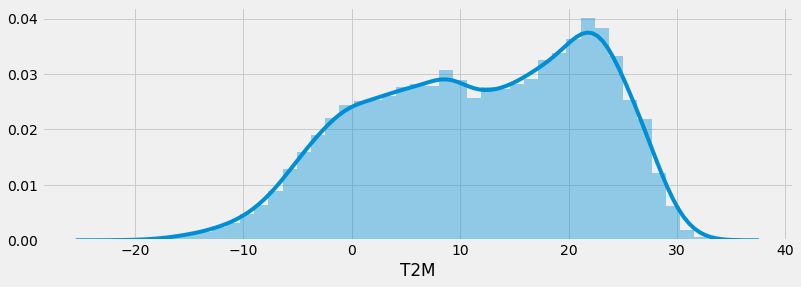

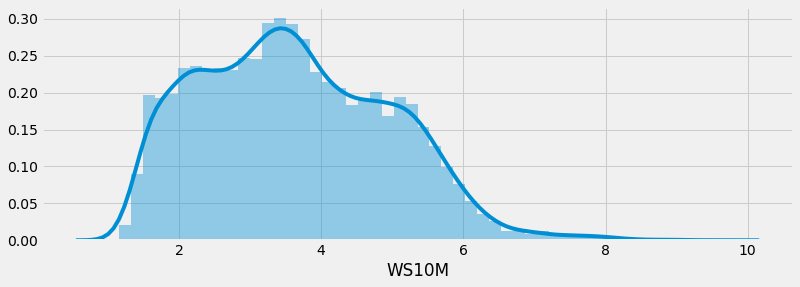

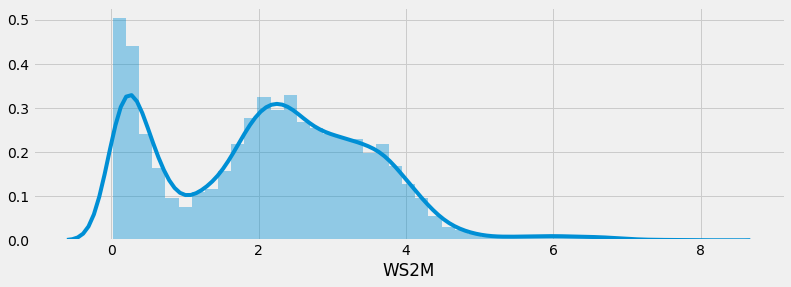

In [177]:
#EDA
for col in dtf.columns.drop(['YEAR', 'STATE', 'month']):
    plt.figure(figsize=(12,4))
    sns.distplot(dtf[col])

In [35]:
dtf.columns

Index(['YEAR', 'STATE', 'HONEY', 'month', 'ALLSKY_SFC_SW_DWN',
       'ALLSKY_TOA_SW_DWN', 'PRECTOT', 'RH2M', 'T2M', 'WS10M', 'WS2M'],
      dtype='object')

In [36]:
dtf_renamed = dtf.rename(columns={'WS10M':'Wind Speed at 10 meters (m/s)',
                                  'WS2M':'Wind Speed at 2 meters (m/s)',
                                  'T2M':'Temperature at 2 meters (Celcius)',
                                  'ALLSKY_SFC_SW_DWN':'All Sky Insolation incident on an horizontal surface (MJ/m2/day)',
                                  'RH2M':'Relative Humidity at 2 meters (%)',
                                  'ALLSKY_TOA_SW_DWN':'Top of Atmosphere insolation (MJ/m2?day)',
                                  'PRECTOT':'Precipitation (mm/day)'})

In [37]:
dtf.columns

Index(['YEAR', 'STATE', 'HONEY', 'month', 'ALLSKY_SFC_SW_DWN',
       'ALLSKY_TOA_SW_DWN', 'PRECTOT', 'RH2M', 'T2M', 'WS10M', 'WS2M'],
      dtype='object')

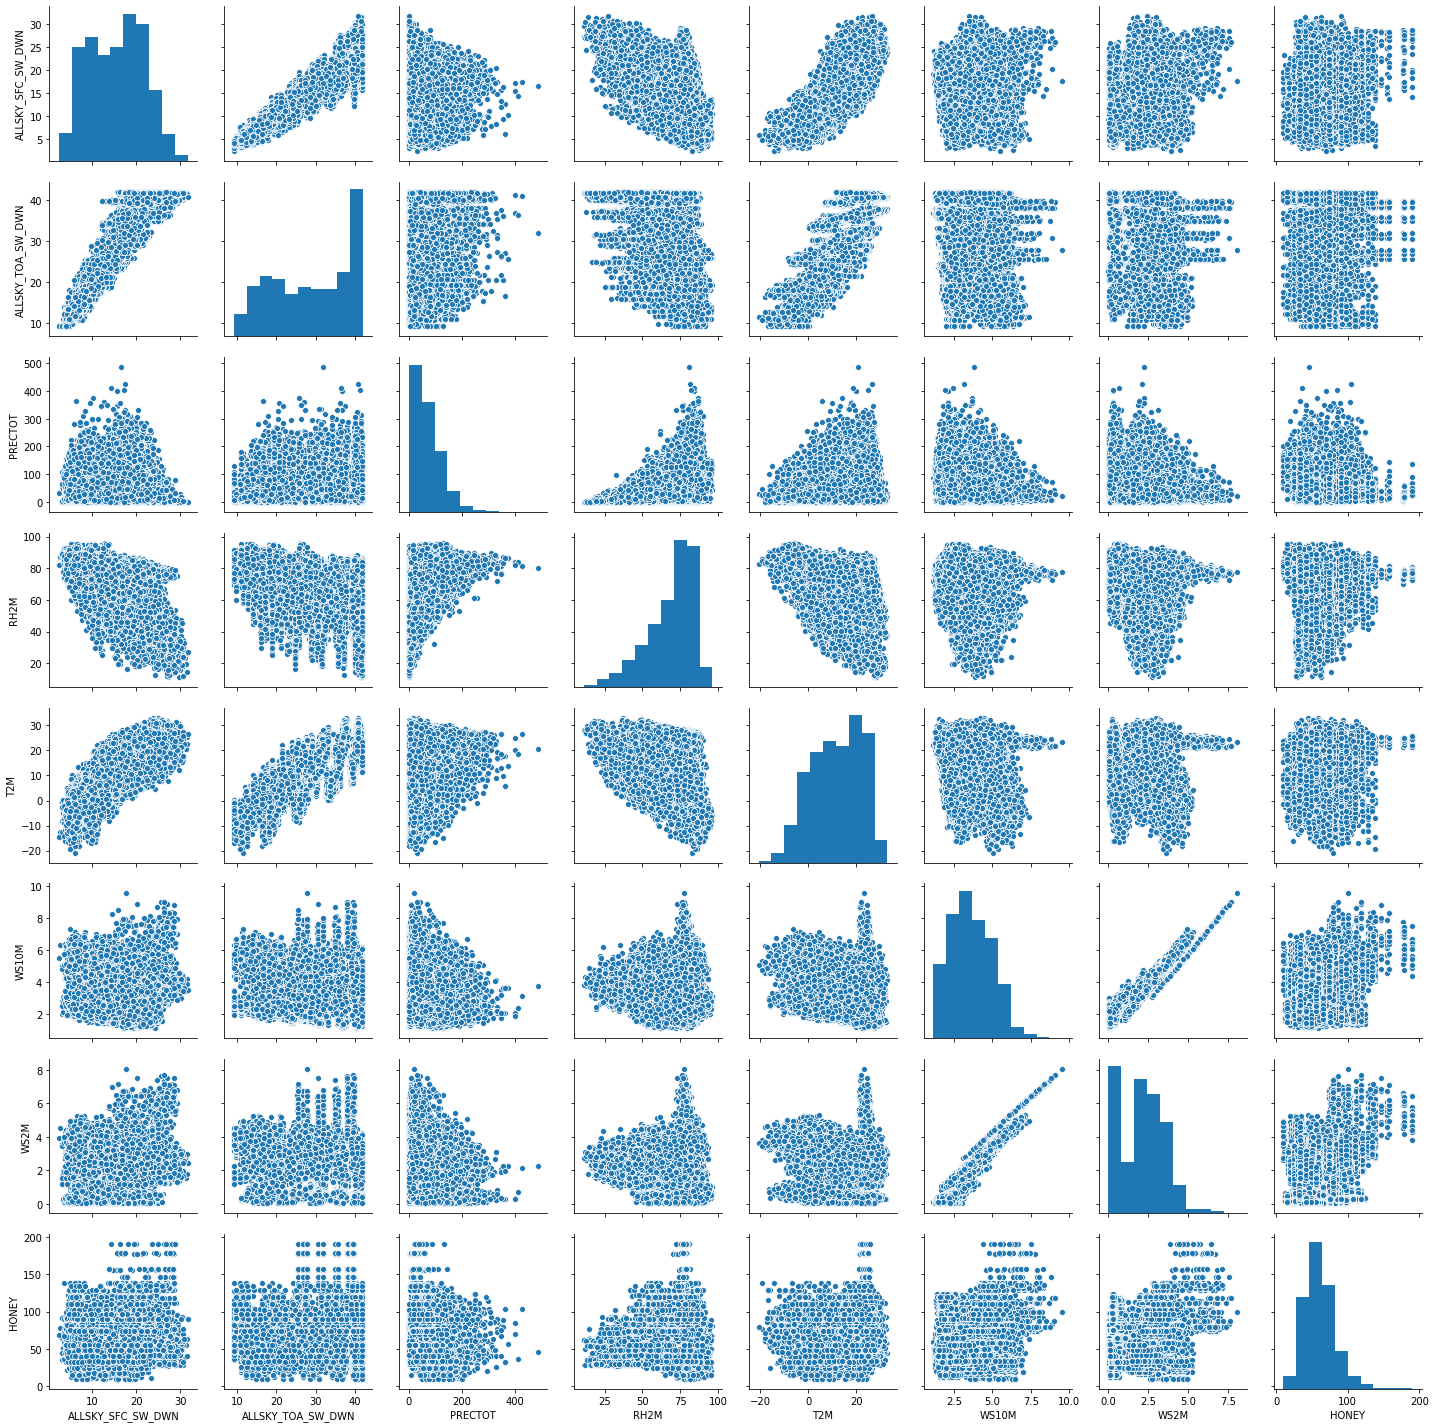

In [41]:
sns.pairplot(dtf[['ALLSKY_SFC_SW_DWN', 'ALLSKY_TOA_SW_DWN',
       'PRECTOT', 'RH2M', 'T2M', 'WS10M', 'WS2M', 'HONEY']])

In [42]:
dtf.head(3)

YEAR    STATE  HONEY month  ALLSKY_SFC_SW_DWN  ALLSKY_TOA_SW_DWN  PRECTOT  \
0  2019  ALABAMA     42   APR              19.85              36.16     4.37   
1  2019  ALABAMA     42   AUG              20.60              37.32     2.85   
2  2019  ALABAMA     42   DEC               7.86              17.82     4.47   

    RH2M    T2M  WS10M  WS2M  
0  77.86  17.21   2.13  0.31  
1  62.02  28.10   1.40  0.20  
2  84.91   9.19   2.37  0.27

/Users/spezzata/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


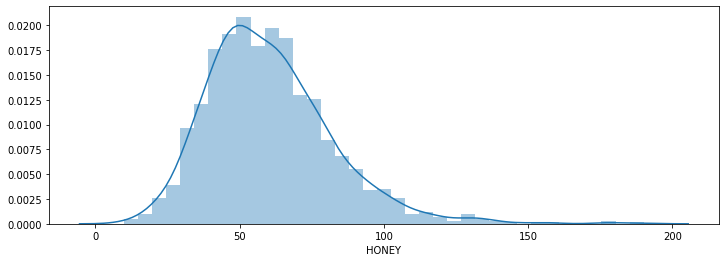

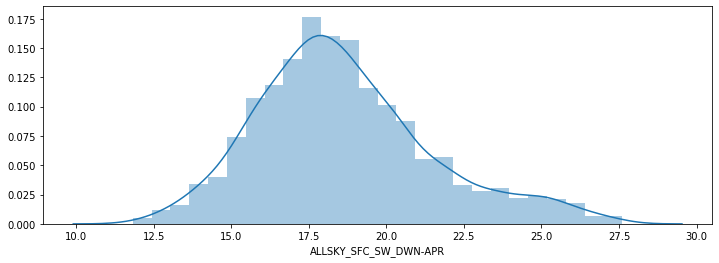

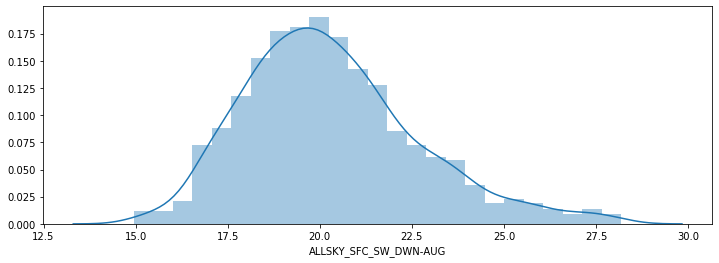

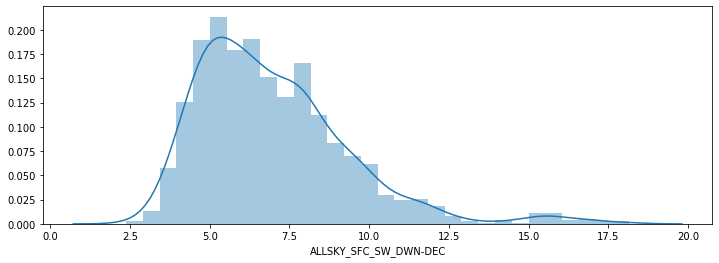

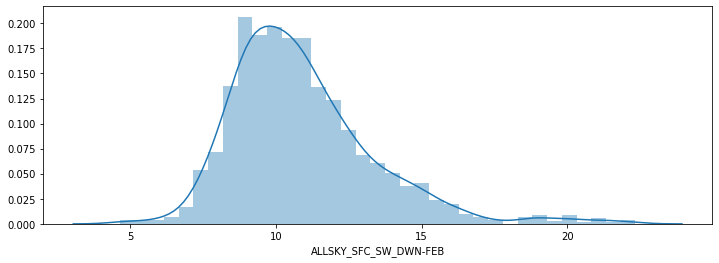

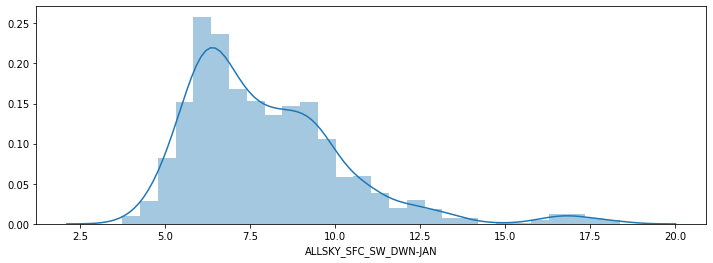

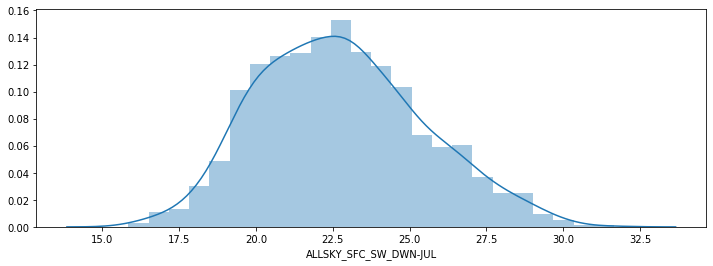

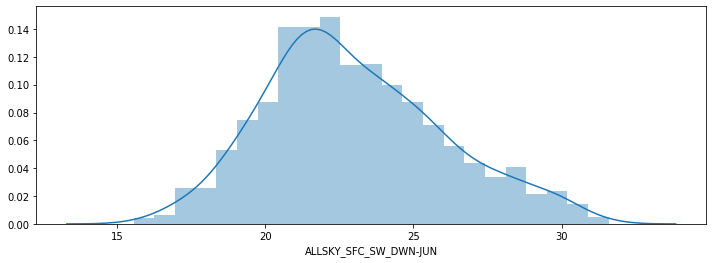

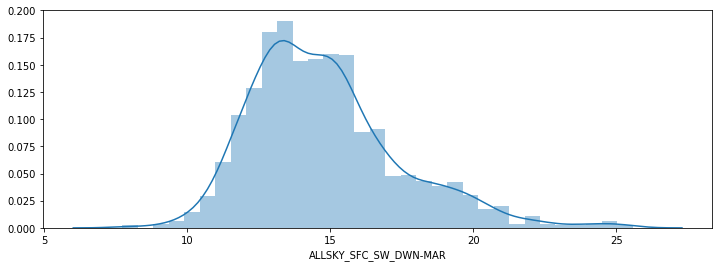

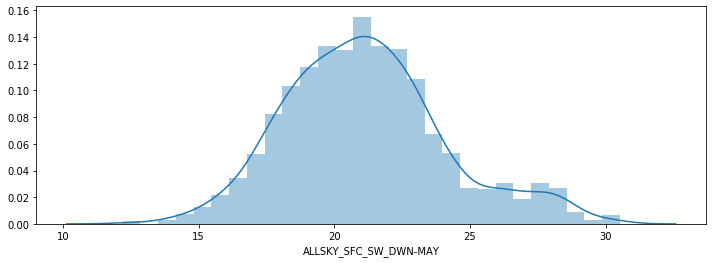

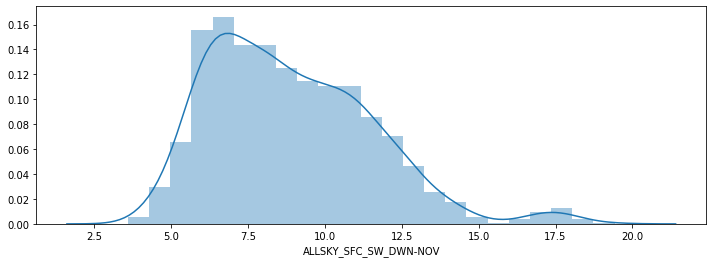

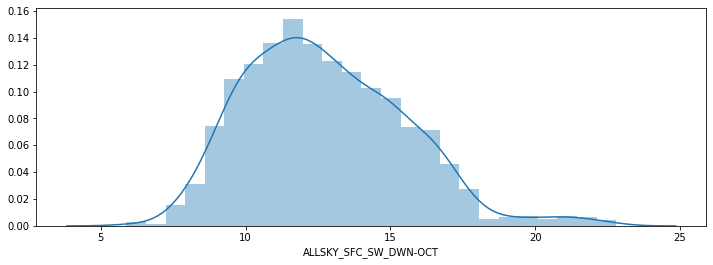

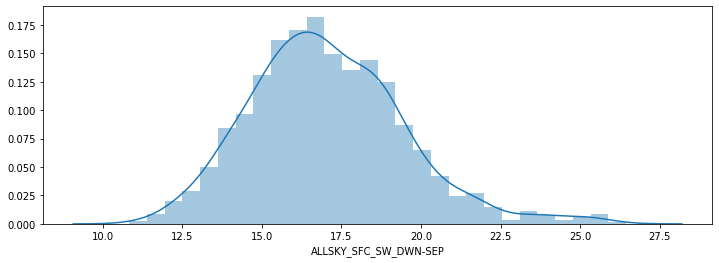

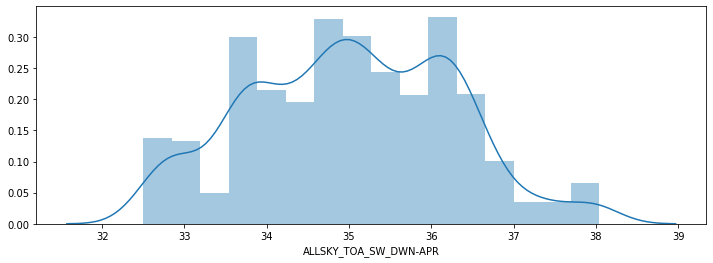

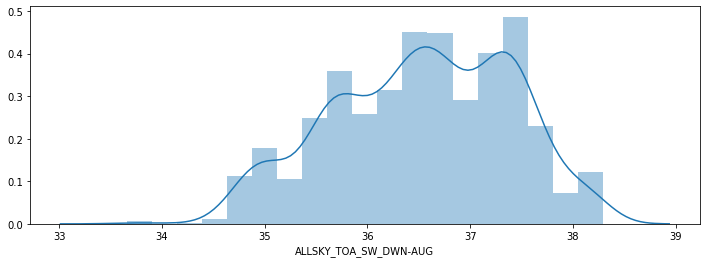

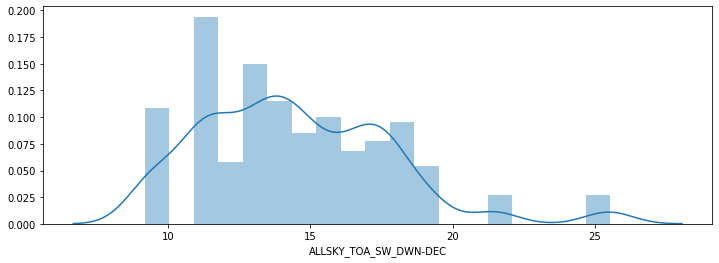

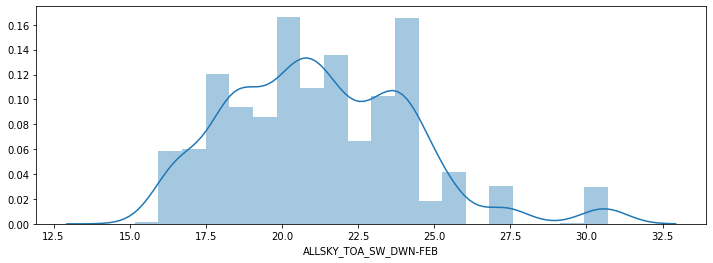

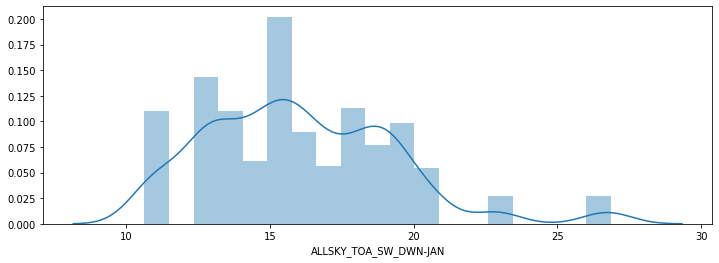

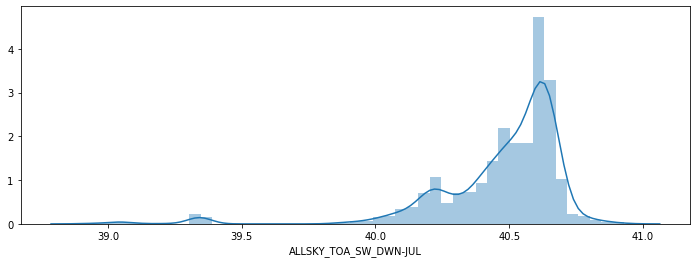

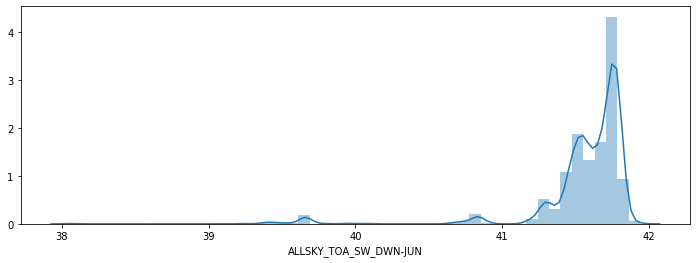

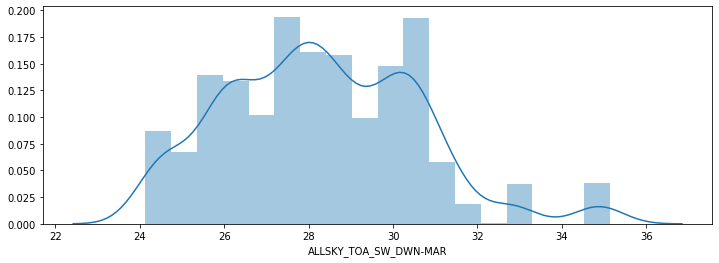

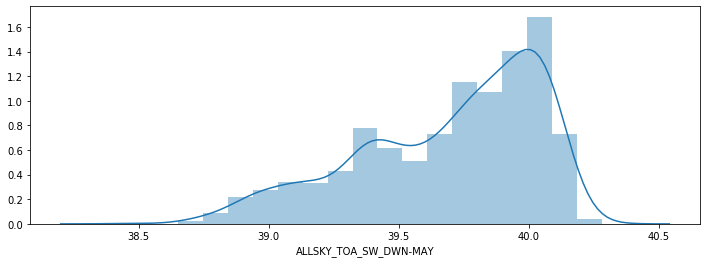

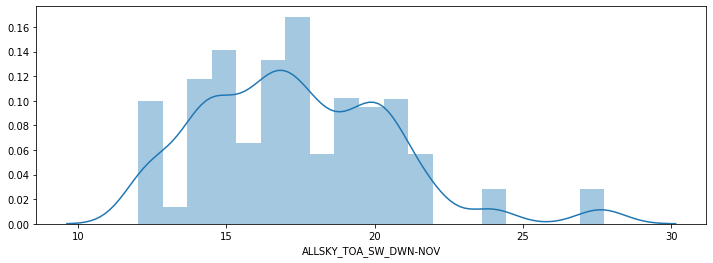

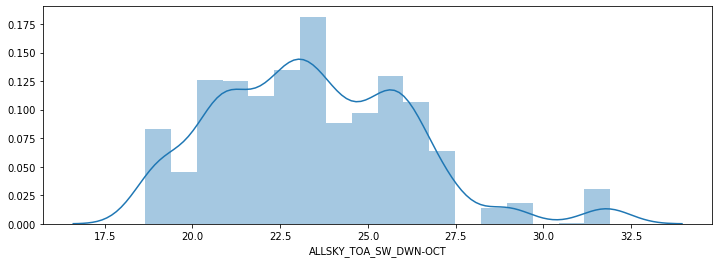

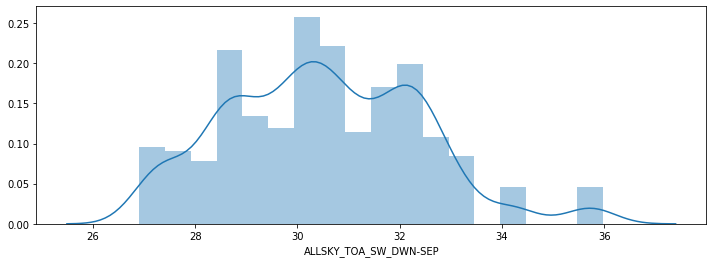

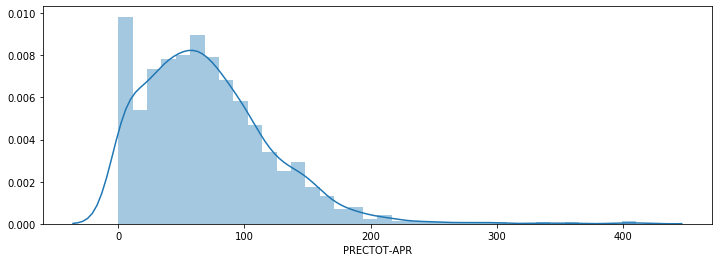

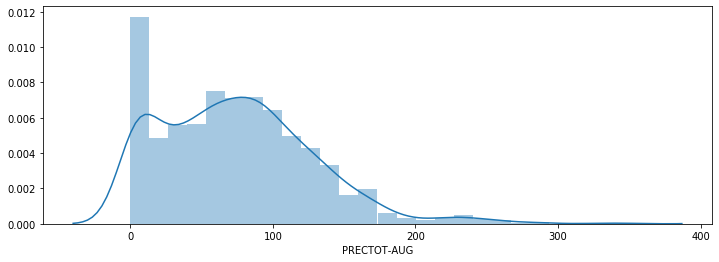

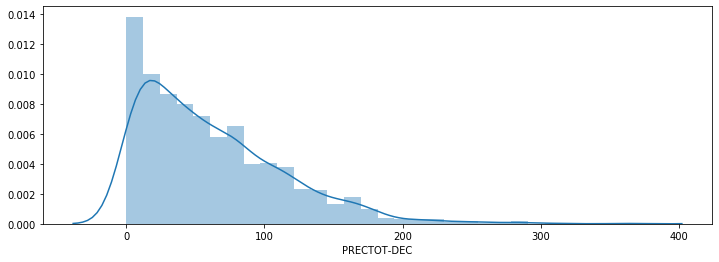

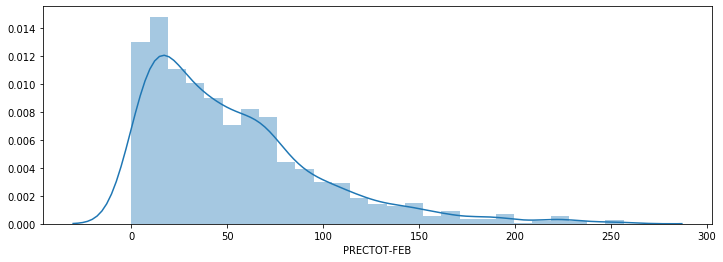

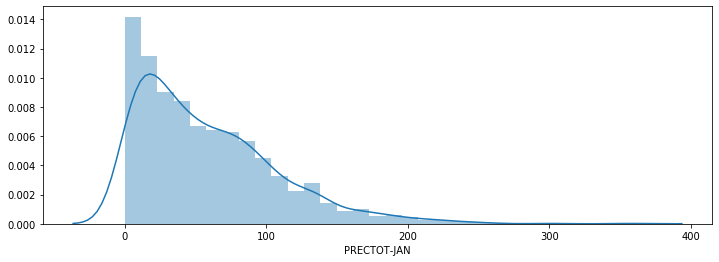

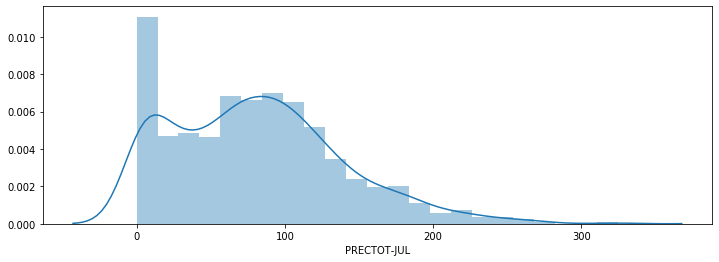

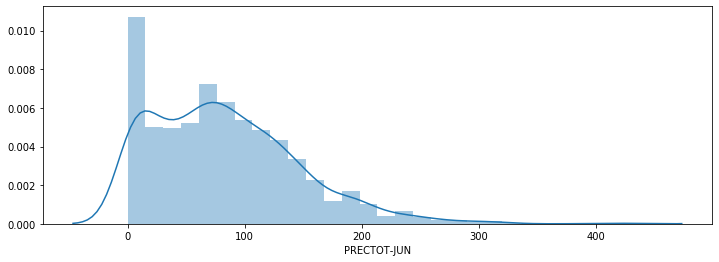

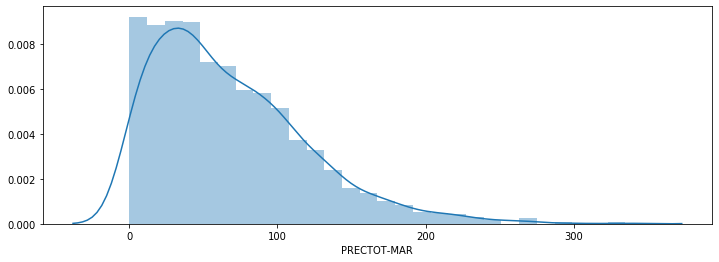

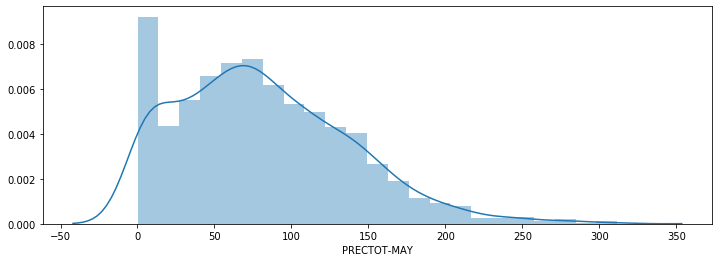

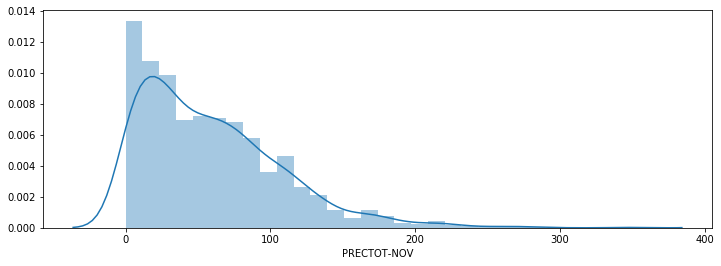

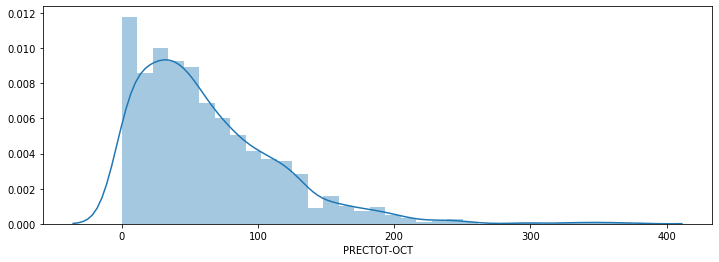

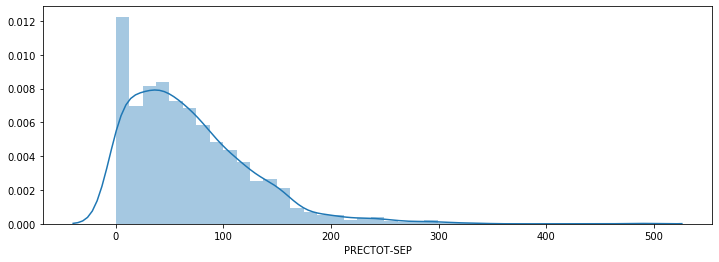

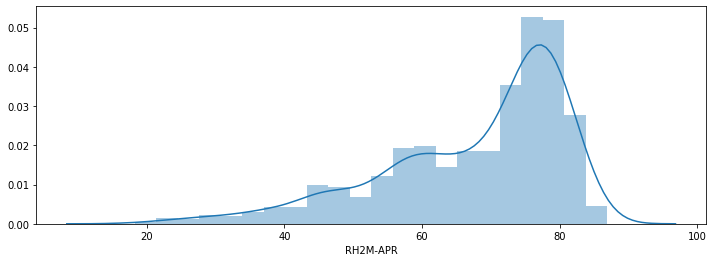

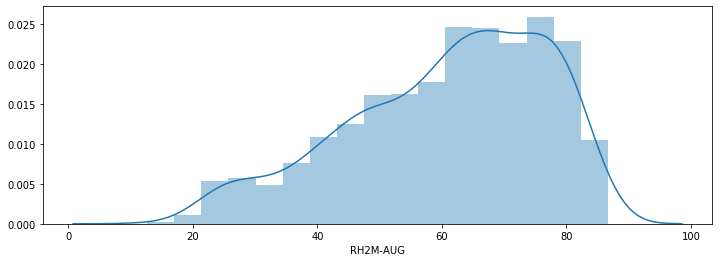

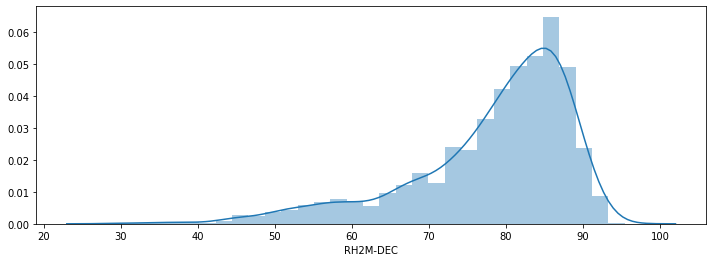

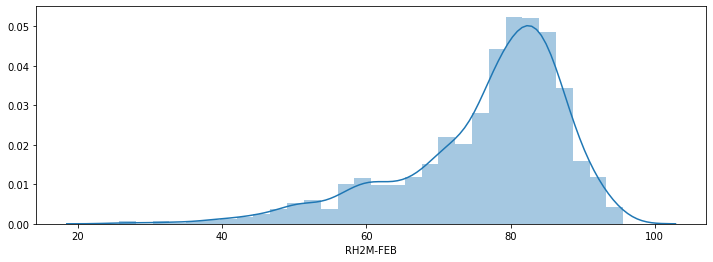

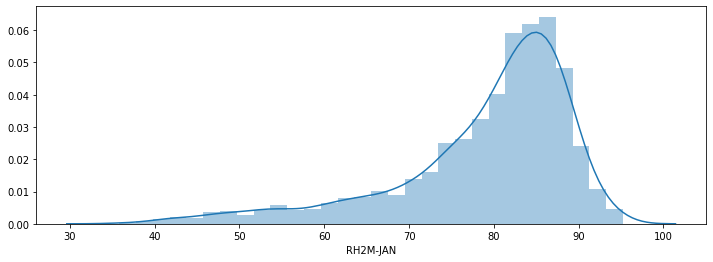

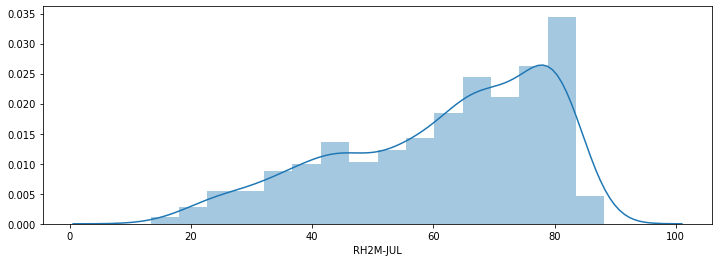

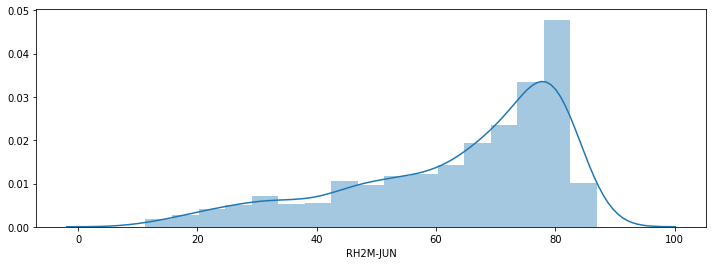

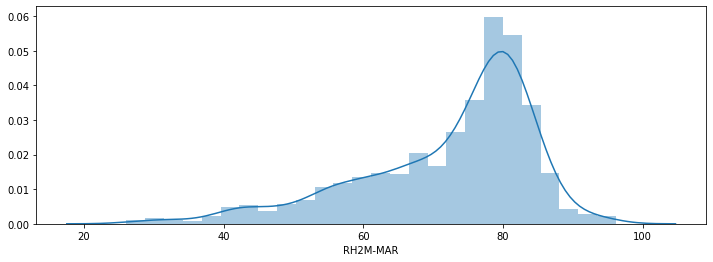

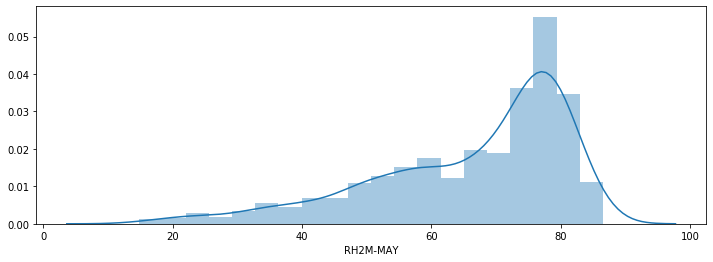

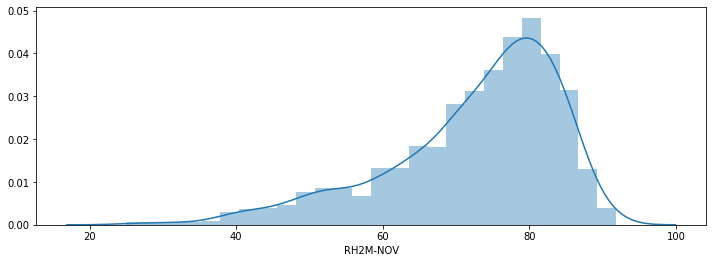

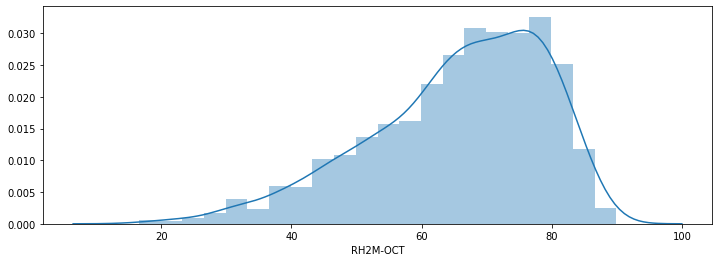

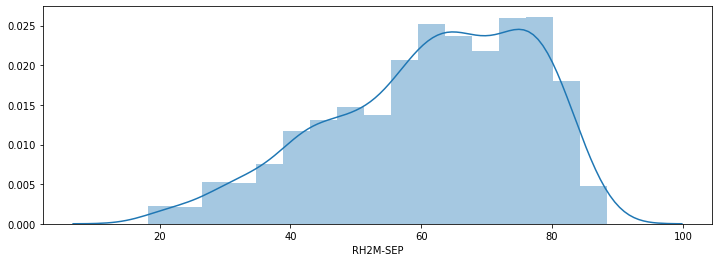

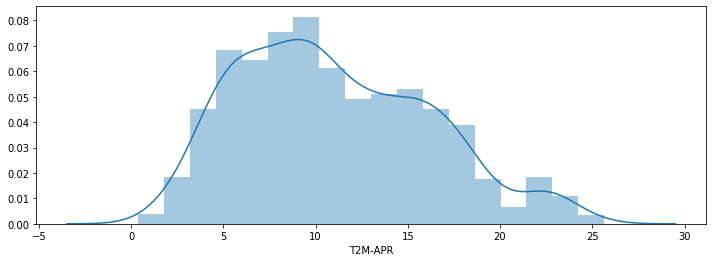

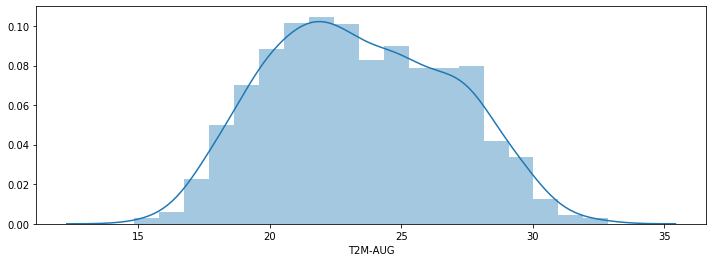

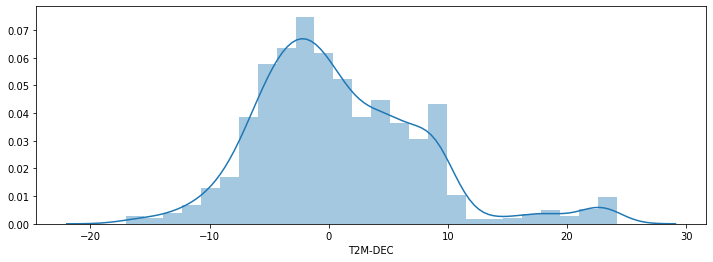

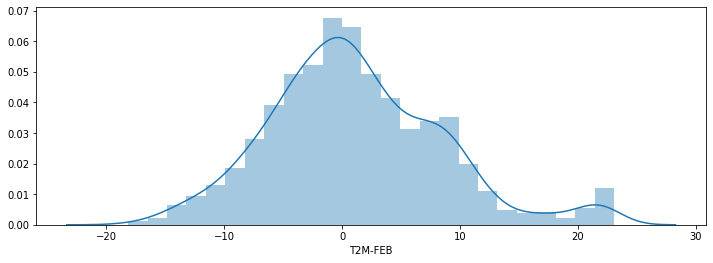

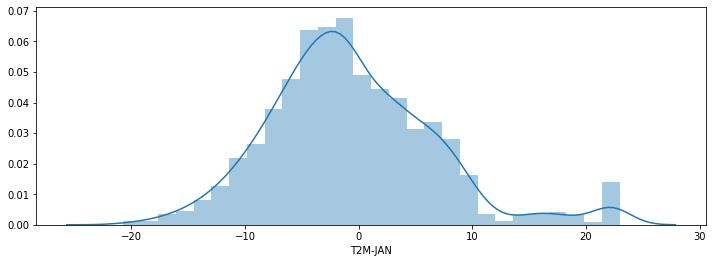

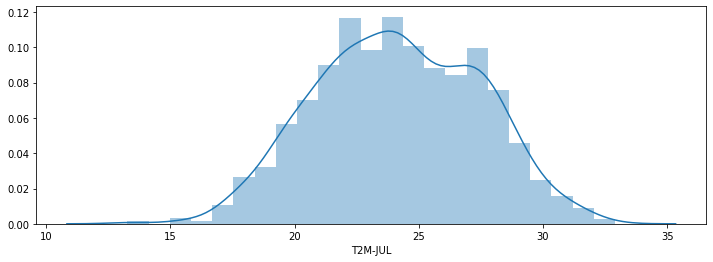

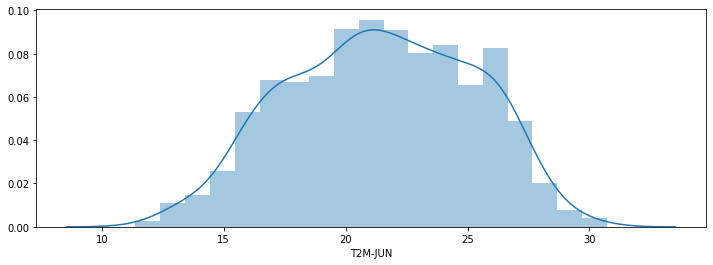

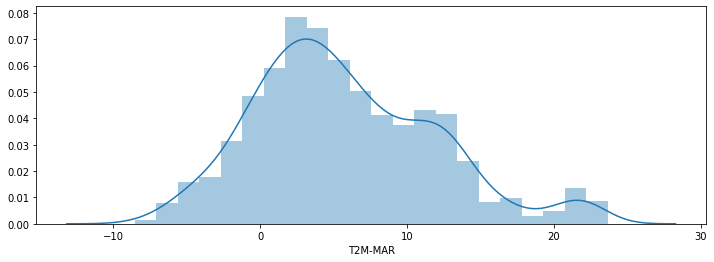

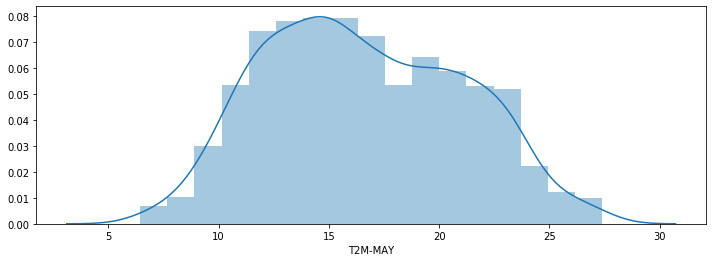

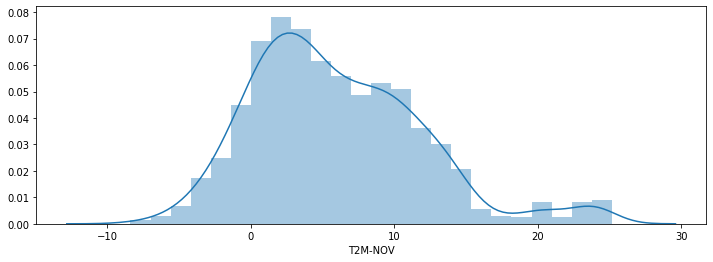

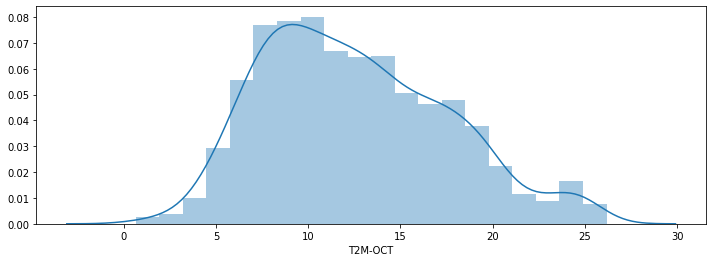

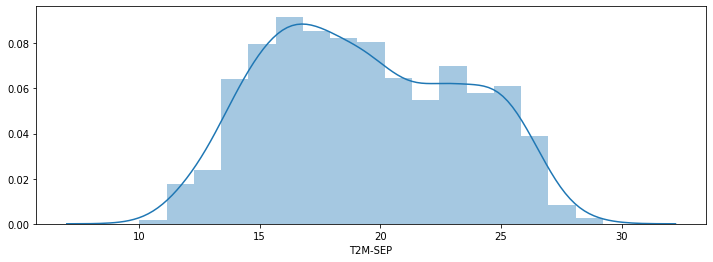

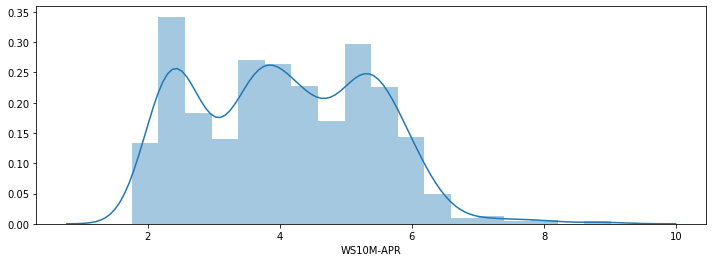

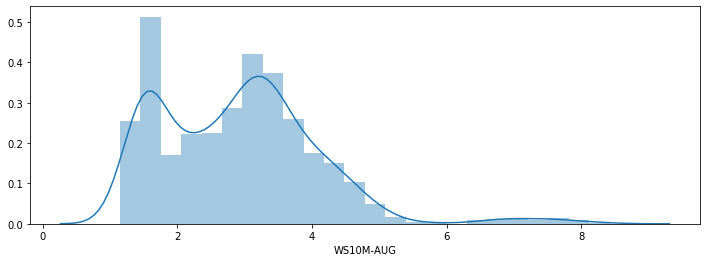

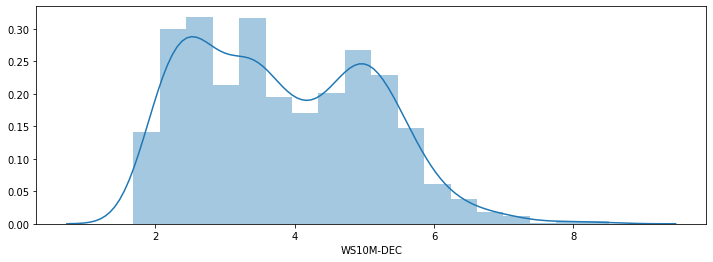

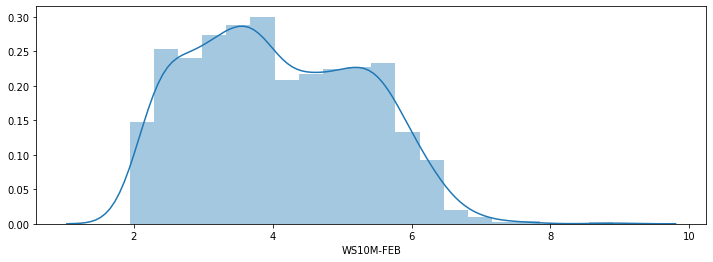

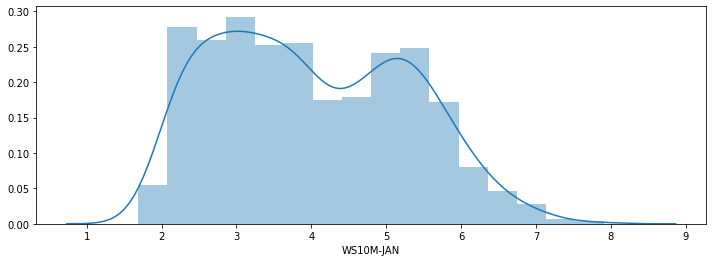

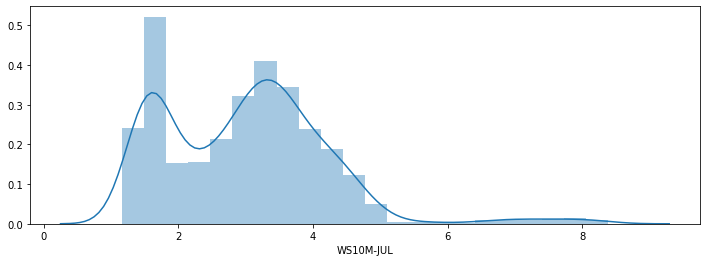

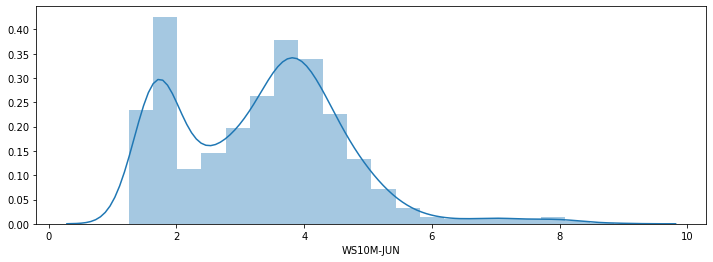

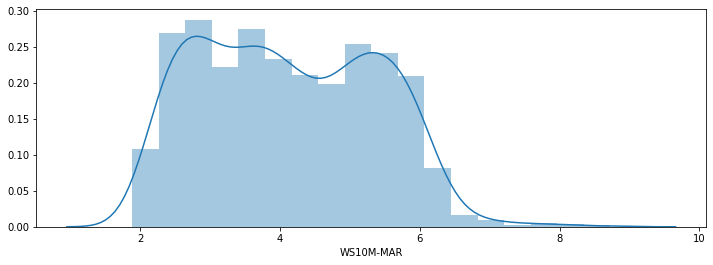

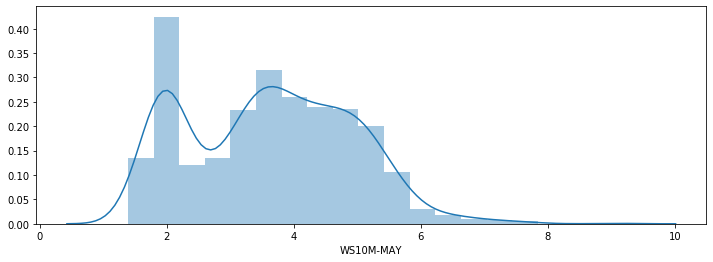

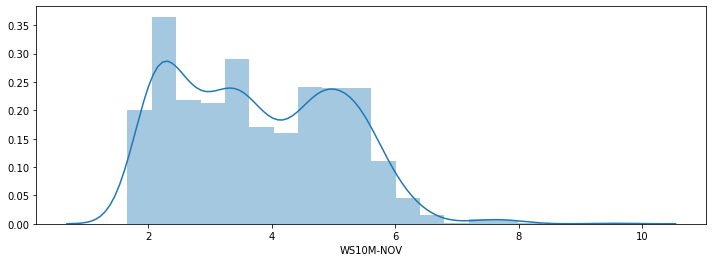

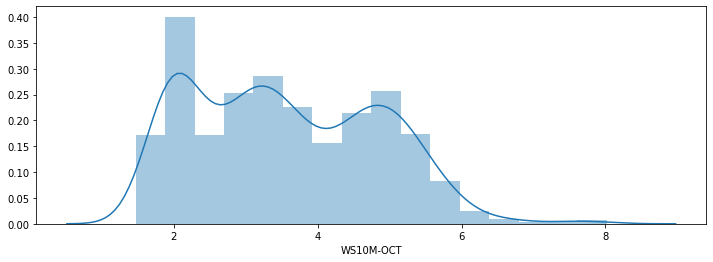

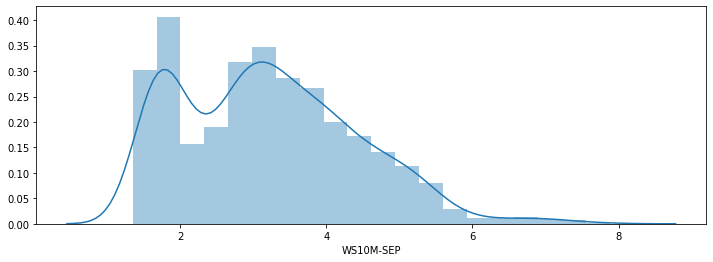

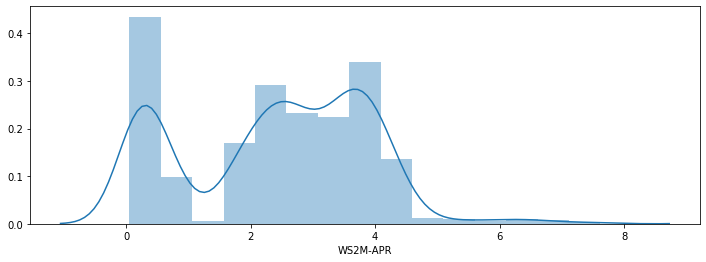

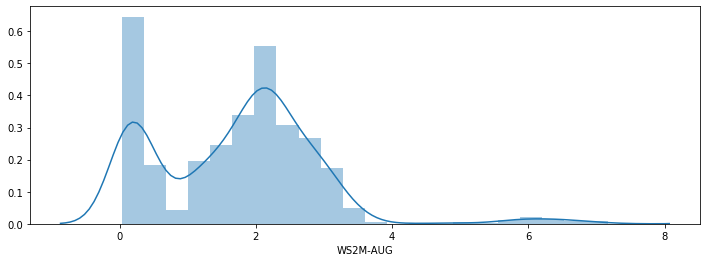

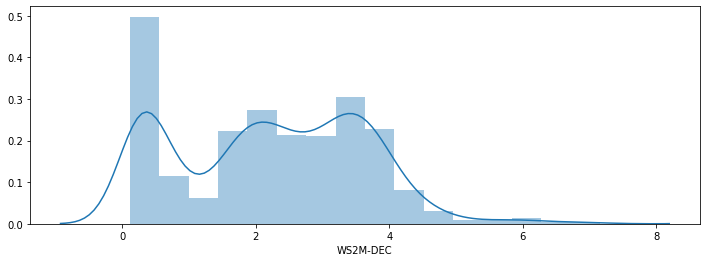

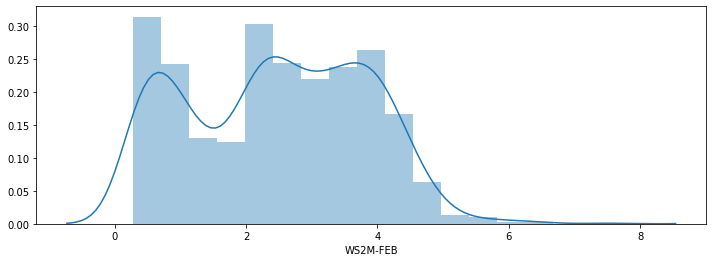

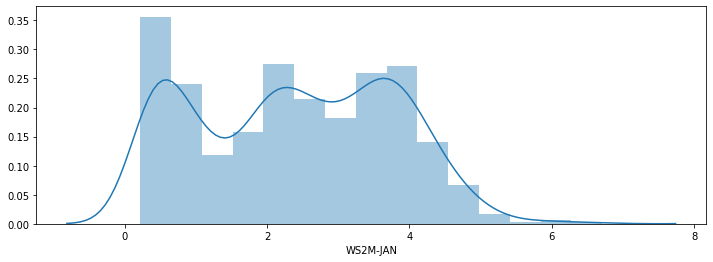

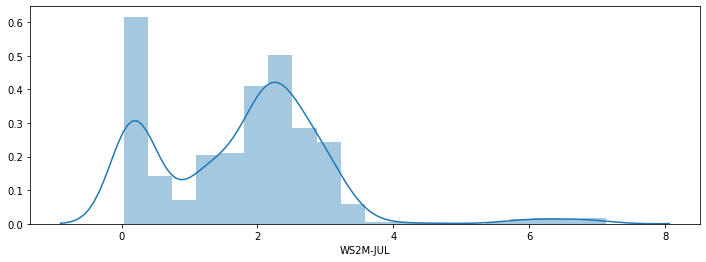

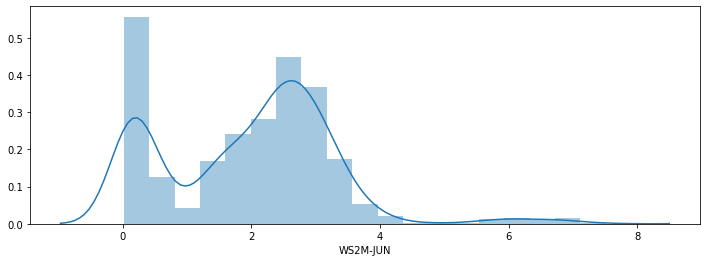

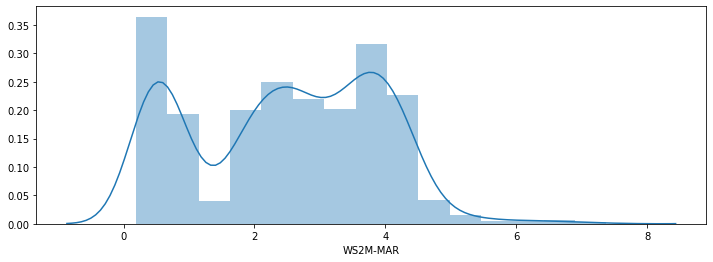

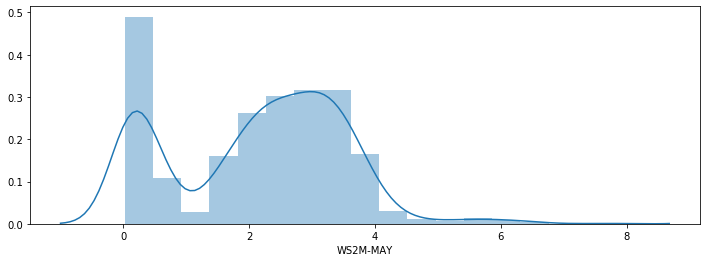

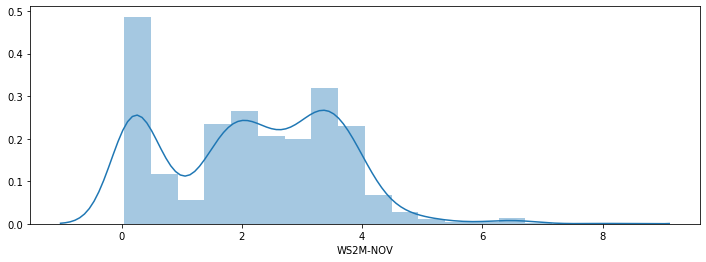

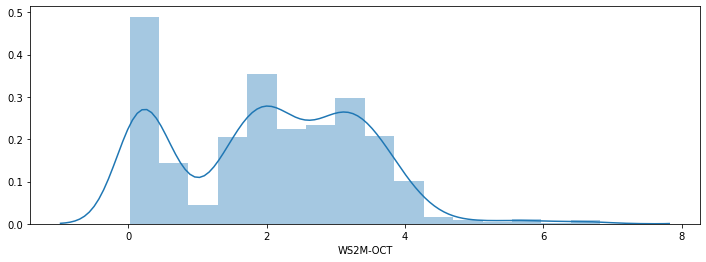

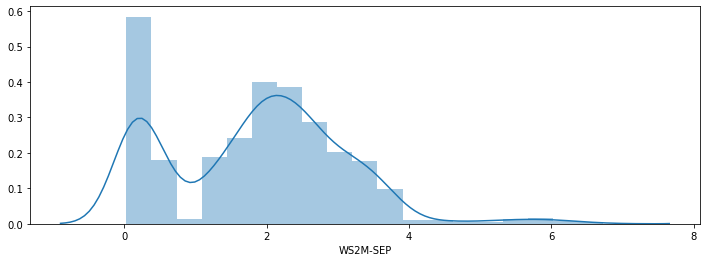

In [65]:
for col in dtf_month.columns.drop(['YEAR', 'STATE']):
    plt.figure(figsize=(12,4))
    sns.distplot(dtf_month[col])

In [48]:
from sklearndf.pipeline import PipelineDF, RegressorPipelineDF
from feature_engine import transformation as vt
from sklearndf.transformation import StandardScalerDF

In [49]:
import shap

In [50]:
dtf_month.head(1)

YEAR    STATE  HONEY  LBPERCOL  NUMCOL  ALLSKY_SFC_SW_DWN-APR  \
0  2019  ALABAMA     42        42    7000                  19.85   

   ALLSKY_SFC_SW_DWN-AUG  ALLSKY_SFC_SW_DWN-DEC  ALLSKY_SFC_SW_DWN-FEB  \
0                   20.6                   7.86                   9.21   

   ALLSKY_SFC_SW_DWN-JAN  ...  WS2M-DEC  WS2M-FEB  WS2M-JAN  WS2M-JUL  \
0                   8.91  ...      0.27      0.31      0.32      0.23   

   WS2M-JUN  WS2M-MAR  WS2M-MAY  WS2M-NOV  WS2M-OCT  WS2M-SEP  
0      0.24      0.28      0.26      0.27      0.24      0.25  

[1 rows x 89 columns]

In [51]:
len(dtf_month[dtf_month['YEAR'].isin([2016, 2017, 2018, 2019])])/len(dtf_month)

0.11363636363636363

- Training set: all years before 2016: 89% of the dataset
- Test set: all years after 2016: 11% of the dataset

In [126]:
X_train = dtf_month[~dtf_month['YEAR'].isin([2016, 2017, 2018, 2019])][dtf_month.columns.drop(['YEAR', 'STATE', 'HONEY', 'LBPERCOL', 'NUMCOL'])]
y_train = dtf_month[~dtf_month['YEAR'].isin([2016, 2017, 2018, 2019])]['HONEY']

X_test = dtf_month[dtf_month['YEAR'].isin([2016, 2017, 2018, 2019])][dtf_month.columns.drop(['YEAR', 'STATE', 'HONEY', 'LBPERCOL', 'NUMCOL'])]
y_test = dtf_month[dtf_month['YEAR'].isin([2016, 2017, 2018, 2019])]['HONEY']

In [127]:
len(X_train)+len(X_test)==len(dtf_month)

True

In [128]:
# set up the variable transformer
ss = StandardScalerDF()
# fit the transformer
ss.fit(X_train)
# transform the data
train_t= ss.transform(X_train)
test_t= ss.transform(X_test)

In [67]:
X = train_t.values
y = y_train.values.ravel()

In [68]:
#for el in train_t.columns:
#    print(train_t[[el]].describe())

In [69]:
import xgboost as xgb
from sklearndf.regression import RandomForestRegressorDF

In [70]:
#mod = xgb.train({"learning_rate": 0.01}, xgb.DMatrix(train_t, label=y_train), 100)

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
RF_model = RandomForestRegressor(max_depth=5, random_state=42, n_jobs=-3).fit(train_t, y_train)

In [73]:
explainer = shap.TreeExplainer(RF_model)
shap_values = explainer.shap_values(train_t)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


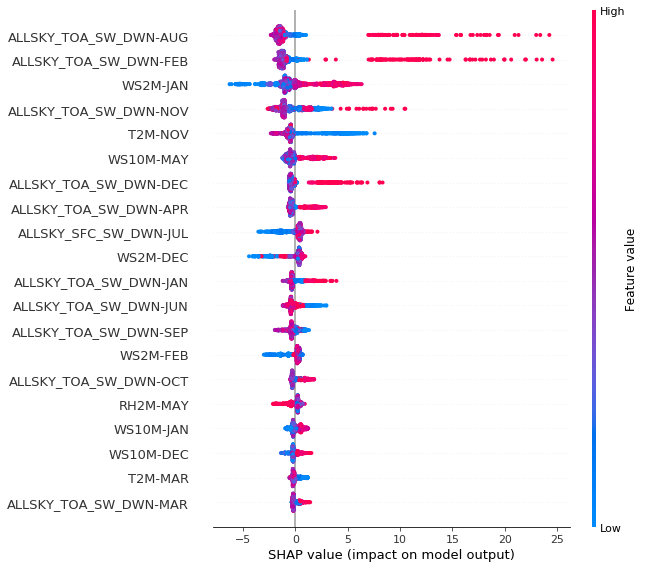

In [74]:
shap.summary_plot(shap_values, train_t)

In [75]:
from boruta import BorutaPy

In [76]:
model_rf = RandomForestRegressor(max_depth=5, random_state=42, n_jobs=-3).fit(train_t, y_train)

In [77]:
feature_selector = BorutaPy(model_rf, n_estimators='auto', verbose=2, random_state=1)
feature_selector.fit(train_t.values, y_train.values.ravel())

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	84
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	84
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	84
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	84
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	84
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	84
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	84
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	35
Tentative: 	27
Rejected: 	22
Iteration: 	9 / 100
Confirmed: 	35
Tentative: 	27
Rejected: 	22
Iteration: 	10 / 100
Confirmed: 	35
Tentative: 	27
Rejected: 	22
Iteration: 	11 / 100
Confirmed: 	35
Tentative: 	27
Rejected: 	22
Iteration: 	12 / 100
Confirmed: 	37
Tentative: 	25
Rejected: 	22
Iteration: 	13 / 100
Confirmed: 	37
Tentative: 	25
Rejected: 	22
Iteration: 	14 / 100
Confirmed: 	37
Tentative: 	23
Rejected: 	24
Iteration: 	15 / 100
Confirmed: 	37
Tentative: 	23
Rejected: 	24
Iteration: 	16 / 100
Confirmed: 	37
Tentative: 	

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=195,
                                         n_jobs=-3,
                                         random_state=RandomState(MT19937) at 0x14B33ED10),
         n_estimators='auto', random_state=RandomState(MT19937) at 0x14B33ED10,
         verbose=2)

In [79]:
import numpy as np

In [80]:
#list of selected festures
features = train_t.columns
final_features = list()
indexes = np.where(feature_selector.support_ == True)
for x in np.nditer(indexes):
    final_features.append(features[x])
for feat in final_features:
    print(feat)

ALLSKY_SFC_SW_DWN-APR
ALLSKY_SFC_SW_DWN-AUG
ALLSKY_SFC_SW_DWN-FEB
ALLSKY_SFC_SW_DWN-JUL
ALLSKY_SFC_SW_DWN-MAR
ALLSKY_SFC_SW_DWN-MAY
ALLSKY_SFC_SW_DWN-SEP
ALLSKY_TOA_SW_DWN-APR
ALLSKY_TOA_SW_DWN-AUG
ALLSKY_TOA_SW_DWN-DEC
ALLSKY_TOA_SW_DWN-FEB
ALLSKY_TOA_SW_DWN-JAN
ALLSKY_TOA_SW_DWN-JUN
ALLSKY_TOA_SW_DWN-MAR
ALLSKY_TOA_SW_DWN-NOV
ALLSKY_TOA_SW_DWN-OCT
ALLSKY_TOA_SW_DWN-SEP
RH2M-APR
RH2M-FEB
RH2M-JAN
RH2M-MAR
RH2M-MAY
RH2M-SEP
T2M-FEB
T2M-JAN
T2M-MAR
T2M-MAY
T2M-NOV
T2M-OCT
T2M-SEP
WS10M-AUG
WS10M-DEC
WS10M-JAN
WS10M-MAY
WS10M-OCT
WS10M-SEP
WS2M-DEC
WS2M-FEB
WS2M-JAN
WS2M-NOV


In [81]:
#list of rejected features
final_features_rejected = list()
indexes_rejected = np.where(feature_selector.support_ == False)
for x in np.nditer(indexes_rejected):
    final_features_rejected.append(features[x])
for feat in final_features_rejected:
    print(feat)

ALLSKY_SFC_SW_DWN-DEC
ALLSKY_SFC_SW_DWN-JAN
ALLSKY_SFC_SW_DWN-JUN
ALLSKY_SFC_SW_DWN-NOV
ALLSKY_SFC_SW_DWN-OCT
ALLSKY_TOA_SW_DWN-JUL
ALLSKY_TOA_SW_DWN-MAY
PRECTOT-APR
PRECTOT-AUG
PRECTOT-DEC
PRECTOT-FEB
PRECTOT-JAN
PRECTOT-JUL
PRECTOT-JUN
PRECTOT-MAR
PRECTOT-MAY
PRECTOT-NOV
PRECTOT-OCT
PRECTOT-SEP
RH2M-AUG
RH2M-DEC
RH2M-JUL
RH2M-JUN
RH2M-NOV
RH2M-OCT
T2M-APR
T2M-AUG
T2M-DEC
T2M-JUL
T2M-JUN
WS10M-APR
WS10M-FEB
WS10M-JUL
WS10M-JUN
WS10M-MAR
WS10M-NOV
WS2M-APR
WS2M-AUG
WS2M-JUL
WS2M-JUN
WS2M-MAR
WS2M-MAY
WS2M-OCT
WS2M-SEP


In [82]:
train_t_selected = train_t[final_features]
test_t_selected = test_t[final_features]

In [83]:
RF_model_v2 = RandomForestRegressor(max_depth=5, random_state=42, n_jobs=-3).fit(txrain_t_selected, y_train)

In [84]:
explainer_v2 = shap.TreeExplainer(RF_model_v2)
shap_values_v2 = explainer_v2.shap_values(train_t_selected)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


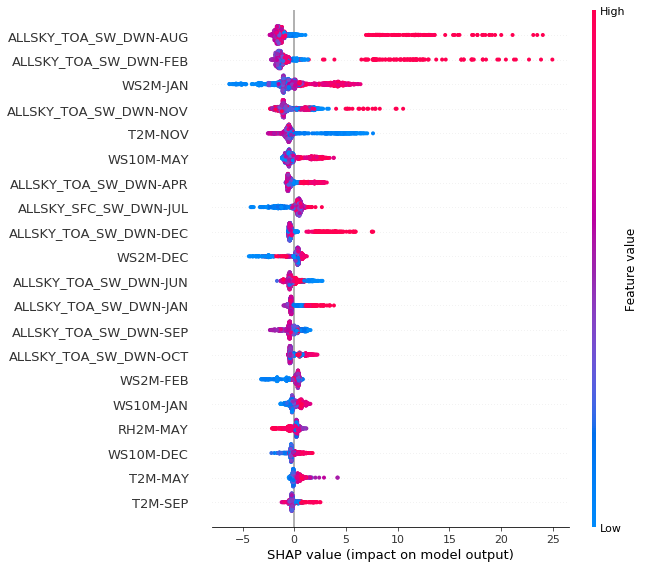

In [85]:
shap.summary_plot(shap_values_v2, train_t_selected)

In [86]:
y_train_predicted = RF_model_v2.predict(train_t_selected)

In [87]:
len(y_train_predicted)

1248

In [88]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [89]:
mean_absolute_percentage_error(y_train, y_train_predicted)

19.782113316980492

In [90]:
y_test_predicted = RF_model_v2.predict(test_t_selected)

In [91]:
mean_absolute_percentage_error(y_test, y_test_predicted)

29.74520414193005

In [93]:
plt.style.use('ggplot')

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


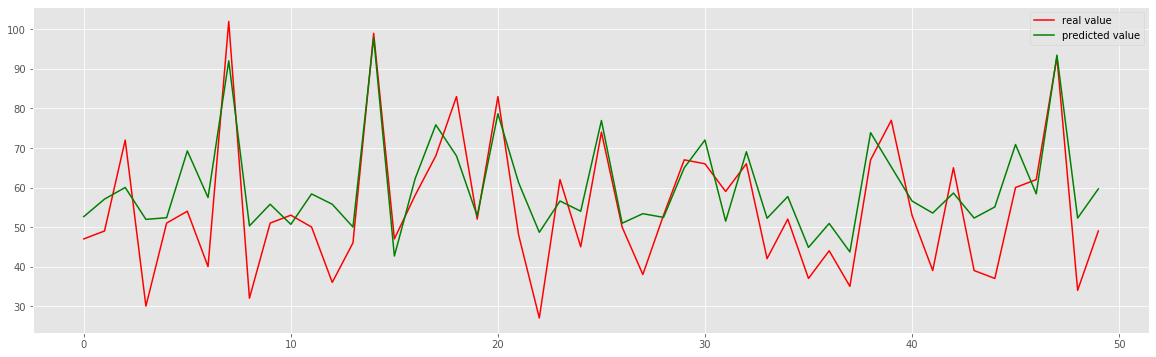

In [94]:
plt.figure(figsize=(20,6))
plt.plot(range(50), y_train[:50], color='r', label='real value')
plt.plot(range(50), y_train_predicted[:50], color='g', label='predicted value')
plt.legend()

In [95]:
len(y_test)

160

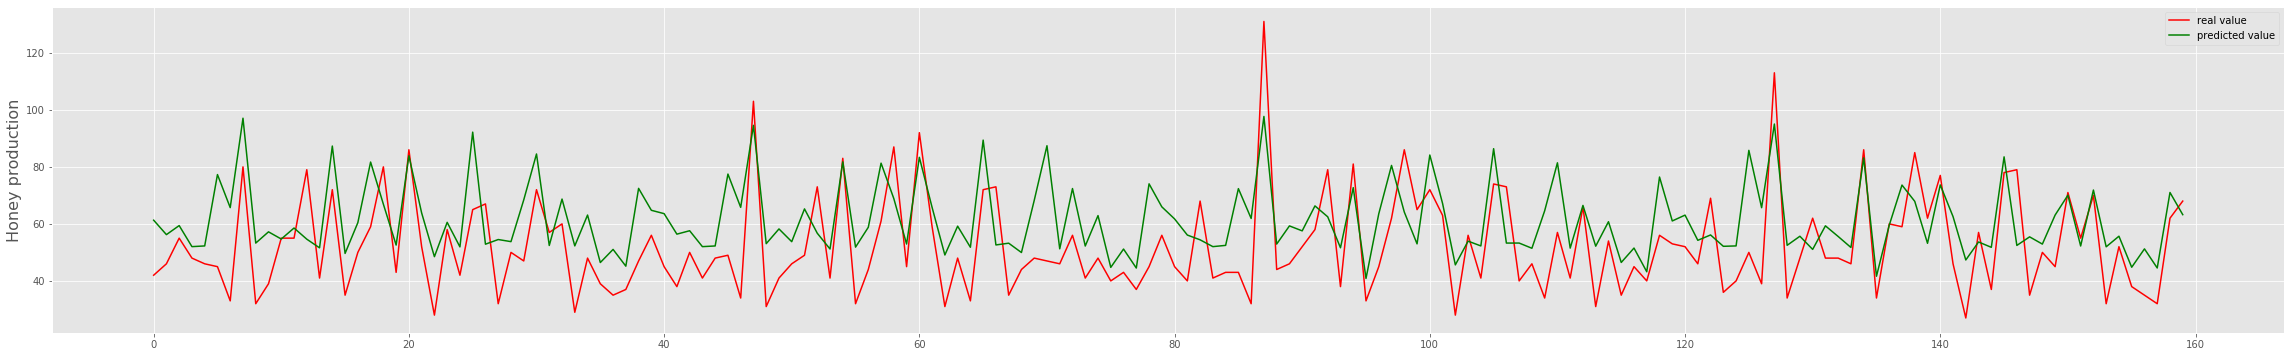

In [96]:
plt.figure(figsize=(40,6))
plt.plot(range(160), y_test, color='r', label='real value')
plt.plot(range(160), y_test_predicted, color='g', label='predicted value')
plt.ylabel('Honey production', size=16)
plt.legend()

In [97]:
def uncertainty_pred(model, X, percentile=95):

    '''
    This function is calculating the uncertainty related to the prediction using
    quantile random forest method, it return the percentile % confidence intervalle,
    as defined in the arguments
    '''

    #we initialize the upper and the lower error limits
    err_down = []
    err_up = []

    #we make the prediction of the intervalle for each example in the training data
    for x in range(len(X)):
        preds = []
        for pred in model.estimators_:
            preds.append(pred.predict([X[x]])[0])
        err_down.append(np.percentile(preds, (100 - percentile) / 2. ))
        err_up.append(np.percentile(preds, 100 - (100 - percentile) / 2.))

    return err_down, err_up

In [98]:
err_down, err_up = uncertainty_pred(RF_model_v2, train_t_selected.values, percentile=80)

In [99]:
np.mean([err_up[i]-err_down[i] for i in range(len(err_up))])

18.242844741261468

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


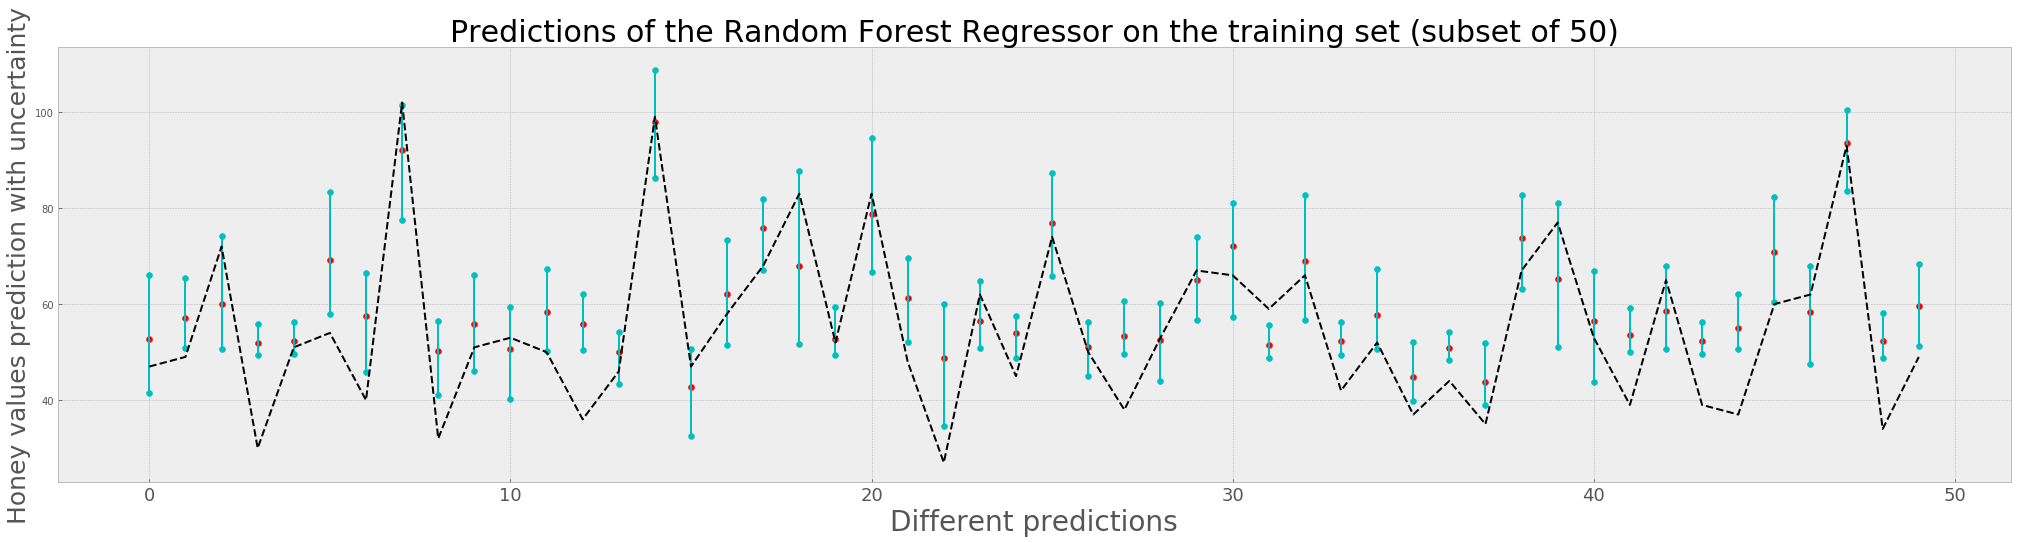

In [100]:
with plt.style.context('bmh'):
    plt.figure(figsize=(35,8))
    plt.vlines(range(50), err_down, err_up, colors='c', linestyles='solid')
    plt.scatter(range(50), err_down[:50], color='c')
    plt.scatter(range(50), err_up[:50], color='c')
    plt.scatter(range(50), y_train_predicted[:50], color='r')
    plt.plot(range(50), y_train[:50], color='black', ls='--')
    plt.xticks(size=18)
    plt.xlabel('Different predictions', size=28)
    plt.ylabel('Honey values prediction with uncertainty', size=25)
    plt.title('Predictions of the Random Forest Regressor on the training set (subset of 50)', size=30)

### Model for the number of colonies

In [129]:
X_train = dtf_month[~dtf_month['YEAR'].isin([2016, 2017, 2018, 2019])][dtf_month.columns.drop(['YEAR', 'HONEY', 'LBPERCOL', 'NUMCOL'])]
y_train = dtf_month[~dtf_month['YEAR'].isin([2016, 2017, 2018, 2019])]['NUMCOL']
y_train_lb = dtf_month[~dtf_month['YEAR'].isin([2016, 2017, 2018, 2019])]['LBPERCOL']

X_test = dtf_month[dtf_month['YEAR'].isin([2016, 2017, 2018, 2019])][dtf_month.columns.drop(['YEAR', 'HONEY', 'LBPERCOL', 'NUMCOL'])]
y_test = dtf_month[dtf_month['YEAR'].isin([2016, 2017, 2018, 2019])]['NUMCOL']
y_test_lb = dtf_month[dtf_month['YEAR'].isin([2016, 2017, 2018, 2019])]['LBPERCOL']

In [130]:
from sklearndf.transformation import OneHotEncoderDF, ColumnTransformerDF
from sklearn.compose import make_column_selector

In [131]:
preprocessing_categorical = PipelineDF(
    steps=[
        ("one-hot", OneHotEncoderDF(sparse=False, handle_unknown="ignore")),
    ]
)

preprocessing_numerical = PipelineDF(
    steps=[
        ("scaler", StandardScalerDF()),
    ]
)

In [132]:
preprocessing_features = ColumnTransformerDF(
    transformers=[
        (
            "categorical",
            preprocessing_categorical,
            make_column_selector(dtype_include=object),
        ),
        (
            "numerical",
            preprocessing_numerical,
            make_column_selector(dtype_include=np.number),
        ),
    ]
)

In [133]:
#fit the transformer
preprocessing_features.fit(X_train)

ColumnTransformerDF(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                    transformer_weights=None,
                    transformers=[('categorical',
                                   PipelineDF(memory=None,
                                              steps=[('one-hot',
                                                      OneHotEncoderDF(categories='auto',
                                                                      drop=None,
                                                                      dtype=<class 'numpy.float64'>,
                                                                      handle_unknown='ignore',
                                                                      sparse=False))],
                                              verbose=False),
                                   <sklearn.compose._column_transformer.make_column_selector object at 0x14e10e1d0>),
                                  ('numerical',
                          

In [134]:
# transform the data
train_t= preprocessing_features.transform(X_train)
test_t= preprocessing_features.transform(X_test)

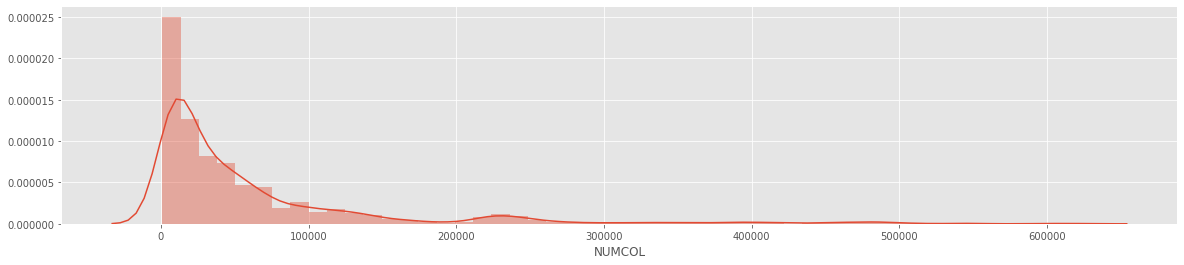

In [135]:
plt.figure(figsize=(20,4))
sns.distplot(y_train)

In [136]:
RF_model = RandomForestRegressor(max_depth=5, random_state=42, n_jobs=-3).fit(train_t, y_train_lb)

In [137]:
explainer = shap.TreeExplainer(RF_model)
shap_values = explainer.shap_values(train_t)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


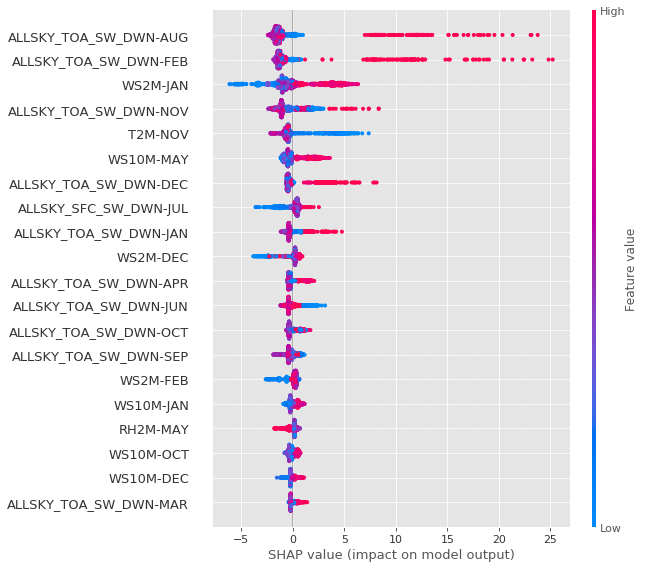

In [138]:
shap.summary_plot(shap_values, train_t)

In [139]:
dtf

YEAR    STATE  HONEY month  NUMCOL  ALLSKY_SFC_SW_DWN  \
0      2019  ALABAMA     42   APR    7000              19.85   
1      2019  ALABAMA     42   AUG    7000              20.60   
2      2019  ALABAMA     42   DEC    7000               7.86   
3      2019  ALABAMA     42   FEB    7000               9.21   
4      2019  ALABAMA     42   JAN    7000               8.91   
...     ...      ...    ...   ...     ...                ...   
16891  1987  WYOMING     74   MAR   39000              13.58   
16892  1987  WYOMING     74   MAY   39000              22.41   
16893  1987  WYOMING     74   NOV   39000               8.02   
16894  1987  WYOMING     74   OCT   39000              13.08   
16895  1987  WYOMING     74   SEP   39000              17.45   

       ALLSKY_TOA_SW_DWN  PRECTOT   RH2M    T2M  WS10M  WS2M  
0                  36.16   131.10  77.86  17.21   2.13  0.31  
1                  37.32    85.50  62.02  28.10   1.40  0.20  
2                  17.82   134.10  84.91   9.19   2.37  0.27  
3                  24.21   178.20  86.81  12.29   2.34  0.31  
4                  19.35   130.80  83.66   6.35   2.21  0.32  
...                  ...      ...    ...    ...    ...   ...  
16891              26.23    33.33  64.03  -1.47   5.04  3.64  
16892              39.41    64.17  49.06  12.98   3.43  2.37  
16893              14.71    27.82  62.58  -0.07   3.68  2.47  
16894              21.22    11.53  44.93   6.11   3.53  2.37  
16895              28.99    17.01  40.32  13.50   3.11  2.10  

[16896 rows x 12 columns]

In [145]:
dtf.groupby('STATE').median()[['NUMCOL']].sort_values(by='NUMCOL', ascending=False)

NUMCOL
STATE                   
CALIFORNIA      400000.0
NORTH DAKOTA    340000.0
SOUTH DAKOTA    245000.0
FLORIDA         220000.0
MONTANA         134000.0
MINNESOTA       132000.0
TEXAS           106000.0
IDAHO           100000.0
MICHIGAN         85000.0
GEORGIA          70000.0
WISCONSIN        68000.0
WASHINGTON       62000.0
NEW YORK         60000.0
OREGON           55000.0
NEBRASKA         50000.0
LOUISIANA        40000.0
WYOMING          39000.0
IOWA             37000.0
ARIZONA          35000.0
ARKANSAS         34000.0
COLORADO         31000.0
UTAH             28000.0
PENNSYLVANIA     26000.0
OHIO             18000.0
MISSISSIPPI      18000.0
MISSOURI         17000.0
NEW MEXICO       14500.0
KANSAS           14000.0
ALABAMA          13000.0
MASSACHUSETTS    13000.0
NORTH CAROLINA   12000.0
NEW JERSEY       11000.0
SOUTH CAROLINA   11000.0
NEVADA           10500.0
MAINE            10000.0
HAWAII            9000.0
ILLINOIS          9000.0
INDIANA           8000.0
TENNESSEE         7000.0
MARYLAND          7000.0
VIRGINIA          7000.0
WEST VIRGINIA     7000.0
OKLAHOMA          6000.0
VERMONT           6000.0
KENTUCKY          5000.0
CONNECTICUT       2000.0
NEW HAMPSHIRE     1000.0
RHODE ISLAND      1000.0
DELAWARE          1000.0